In [ ]:
# Install necessary libraries (if not already installed)
!pip install pandas numpy matplotlib seaborn
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
# Note: Upload your CSV file in Colab and adjust the path accordingly
from google.colab import files
uploaded = files.upload()
# Read the CSV file into a DataFrame
df = pd.read_csv("earthquake_data.csv")
# Display the first few rows of the dataset
print(df.head())
unique_values=df['place'].unique()
print(unique_values)
mode_value=df['place'].mode().iloc[0]
print(mode_value)
min_date=df['time'].min()
max_date=df['time'].max()
print(f"Time duration is from {min_date} to {max_date}")
# Basic statistics of the dataset
print(df.describe())
# Check for missing values
print("Missing values are:\n", df.isnull().sum())
# Handle missing values
# You may choose different imputation techniques based on your dataset and context
# In this example, we'll fill missing numerical values with the mean
df.fillna(df.mean(), inplace=True)
# Check for duplicates
print("Duplicate entries are:", df.duplicated().sum())
# Remove duplicates
df.drop_duplicates(inplace=True)
# Perform additional data cleaning as needed
# For example, drop unnecessary columns, handle outliers, etc.
# Verify changes
print("Updated datasetis given as:\n", df.head())
# Check for missing values and duplicates after cleaning
print("The values that are Missing after cleaning are:\n", df.isnull().sum())
print("The duplicate entries after cleaning are: ", df.duplicated().sum())


Saving earthquake_data.csv to earthquake_data (2).csv
                       time  latitude  longitude   depth  mag magType    nst  \
0  2023-12-07T12:56:30.660Z  -20.6585   169.2064  48.364  7.1     mww  105.0   
1  2023-12-03T19:49:36.868Z    8.9535   126.6186  28.606  6.9     mww  151.0   
2  2023-12-03T10:35:57.353Z    8.4498   126.7204  56.162  6.6     mww  122.0   
3  2023-12-02T14:37:03.945Z    8.5266   126.4487  32.763  7.6     mww   79.0   
4  2023-11-27T21:46:41.934Z   -3.5708   144.0415   8.007  6.5     mww  157.0   

    gap   dmin   rms  ...                   updated  \
0  32.0  2.542  1.04  ...  2023-12-08T13:07:29.713Z   
1  25.0  2.136  0.90  ...  2023-12-12T21:35:40.012Z   
2  32.0  1.777  0.95  ...  2023-12-10T03:56:07.118Z   
3  79.0  1.685  1.03  ...  2023-12-11T10:42:40.389Z   
4  23.0  3.495  0.60  ...  2023-11-28T21:54:13.980Z   

                                 place        type horizontalError depthError  \
0         123 km S of Isangel, Vanuatu  earthquake   

<ipython-input-3-d6a2ee3a84fa>:30: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [ ]:
df.tail(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
1068,2000-12-06T22:57:40.040Z,-4.218,152.725,31.0,6.5,mwc,401.0,27.25902,3.310695,0.98,...,2022-04-29T19:00:54.799Z,"52 km ENE of Kokopo, Papua New Guinea",earthquake,6.64753,3.671046,0.049429,55.839721,reviewed,us,hrv
1069,2000-12-06T17:11:06.400Z,39.566,54.799,30.0,7.0,mwc,495.0,27.25902,3.310695,0.90,...,2022-04-29T19:00:52.062Z,"37 km E of Balkanabat, Turkmenistan",earthquake,6.64753,3.671046,0.049429,55.839721,reviewed,us,hrv


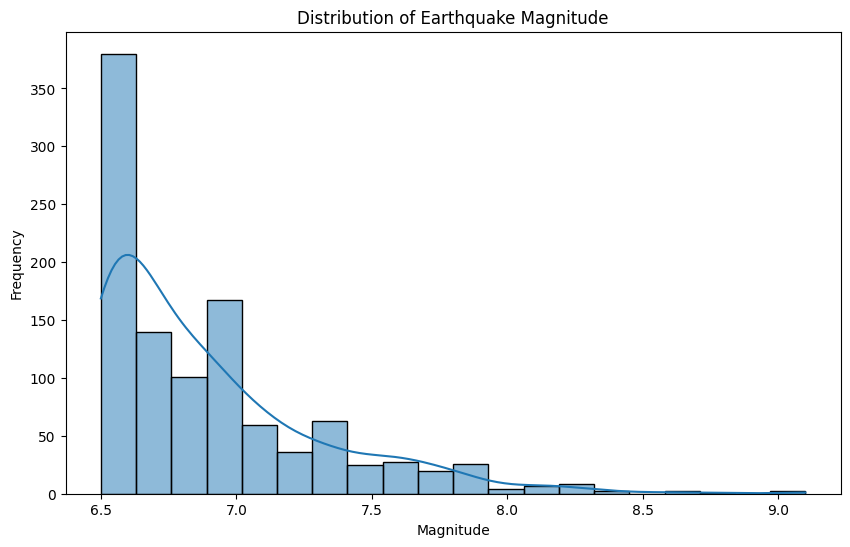

In [ ]:
# Data visualization using bar chart plotting
# 1. Histogram of Magnitude
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['mag'], bins=20, kde=True)
plt.title('Distribution of Earthquake Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.savefig('output_chart.png')

# Show the plot (optional)
plt.show()

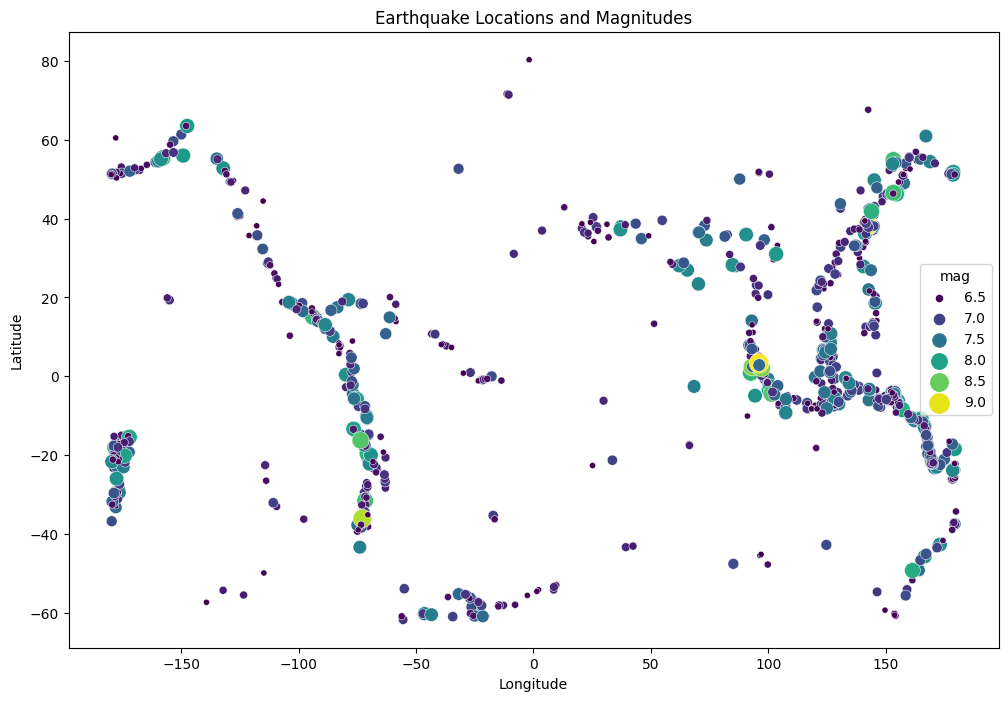

In [ ]:
# 2. Scatter plot of Latitude vs Longitude
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='mag', size='mag', palette='viridis', sizes=(20, 200))
plt.title('Earthquake Locations and Magnitudes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

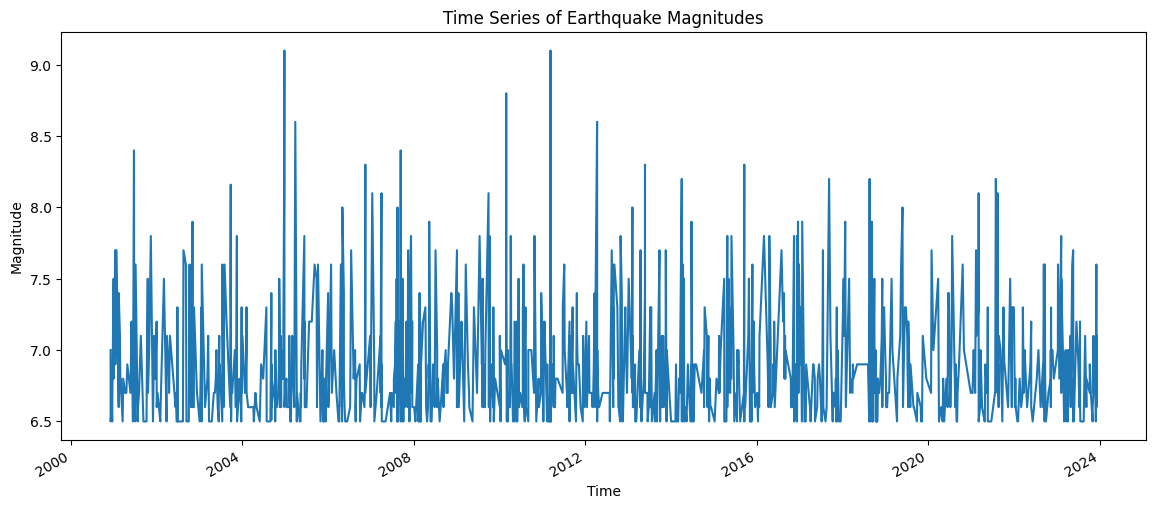

In [ ]:
# 3. Time Series plot of Magnitude
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
plt.figure(figsize=(14, 6))
df['mag'].plot()
plt.title('Time Series of Earthquake Magnitudes')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.show()

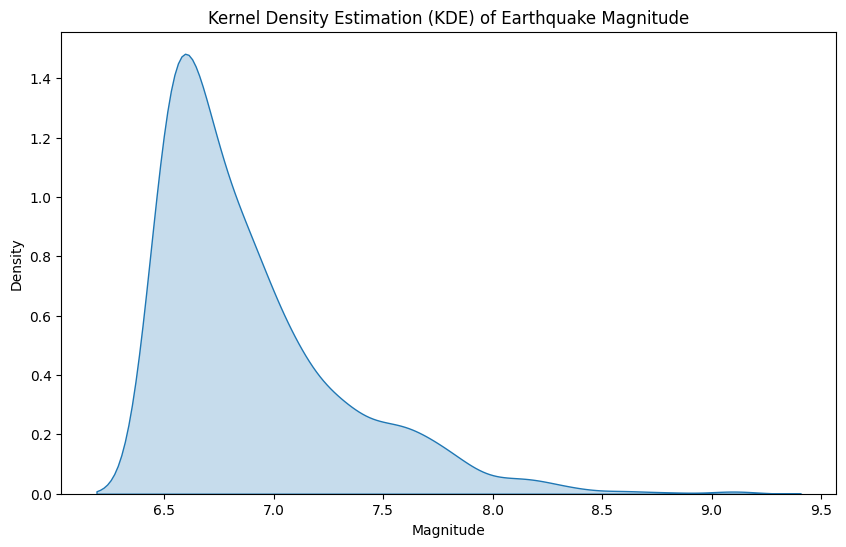

In [ ]:
# KDE plot for 'mag' variable
plt.figure(figsize=(10, 6))
sns.kdeplot(df['mag'], fill=True)
plt.title('Kernel Density Estimation (KDE) of Earthquake Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Density')
plt.show()

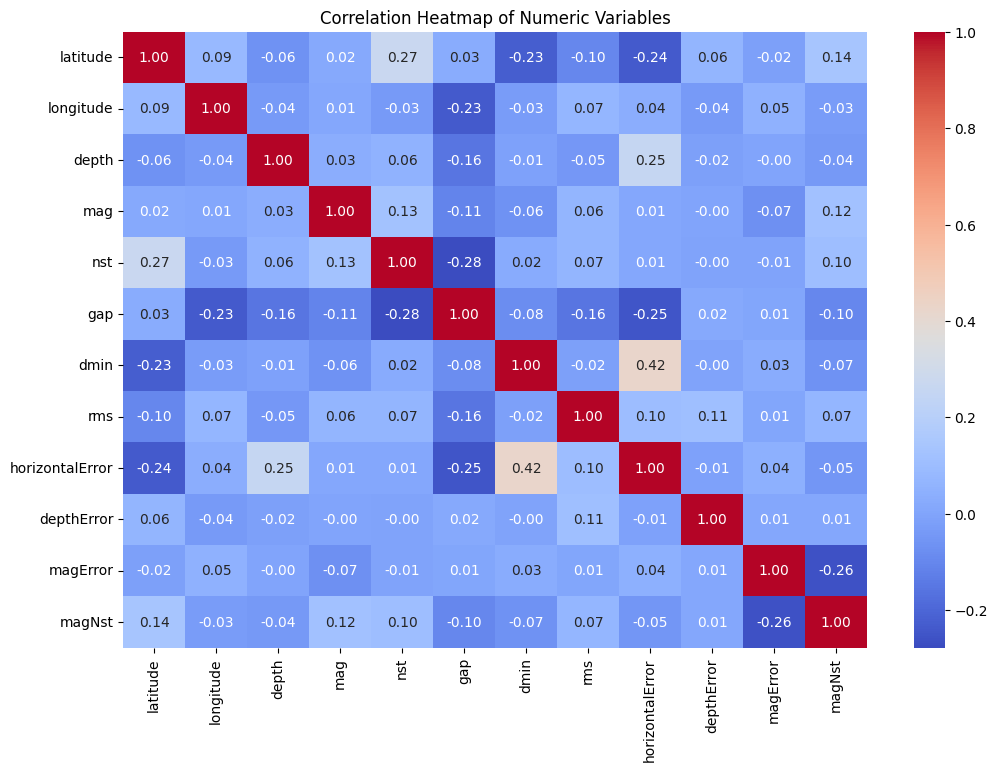

In [ ]:
# 2. Correlationq q qq heatmap
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()